In [1]:
# Import CVX and numpy libraries
import cvxpy as cvx
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def generate(n,npoints):
    # Set the limits
    origA = np.full((n+1,n),-5.)
    rangA = np.full((n+1,n), 10.)
    origP = np.full((npoints,n),-5.)
    rangP = np.full((npoints,n), 10.)

    # Construct the anchor points
    a = np.random.rand(n+1,n)
    a = origA + np.multiply(a,rangA)

    # Construct the sensor points
    p = np.random.rand(npoints,n)
    p = origP + np.multiply(p,rangP)

    adjacency = np.full((npoints+n+1,npoints+n+1),-1.)

    if(n > 1):
        minConstr = 3
        maxConstr = 4
        minPointConstr = 2
        minAnchConstr = 2
    else:
        minConstr = 2
        maxConstr = 3
        minPointConstr = 1
        minAnchConstr = 1

    anchList = [i for i in range(n+1)]
    pointList = [i for i in range(npoints)]
    off = n + 1

    for i in range(npoints):
        random.shuffle(anchList)
        random.shuffle(pointList)
        # Set anchor constraints, between 1 and 3
        numAnch = random.randint(minAnchConstr,minConstr)
        for l in range(numAnch):
            adjacency[anchList[l],i+off] = np.linalg.norm(a[anchList[l]] - p[i])
            adjacency[i+off,anchList[l]] = adjacency[anchList[l],i+off]
        print(numAnch)
        # Count number of constraints already set for this point
        countConstr = 0
        for l in range(npoints+off):
            if(adjacency[l,i+off] > 0):
                countConstr = countConstr + 1
        # Set point constraints, between 0 and 3
        if(minConstr - countConstr >= 0):
            numPoint = random.randint(minConstr-countConstr,3)
            count = numPoint
            l = 0
            while(count > 0 and l < len(pointList)):
                if(pointList[l] != i):
                        countConstr = 0
                        for k in range(npoints+off):
                            if(adjacency[k,pointList[l]+off] > 0):
                                countConstr = countConstr + 1
                        if(countConstr < maxConstr):
                            adjacency[pointList[l]+off,i+off] = np.linalg.norm(p[pointList[l]] - p[i])
                            adjacency[i+off,pointList[l]+off] = adjacency[pointList[l]+off,i+off]
                            count = count - 1
                l = l + 1
    return [a, p, adjacency]

In [3]:
def generate_inside_hull(n,npoints):
    # Set the limits
    origA = np.full((n+1,n),-5.)
    rangA = np.full((n+1,n), 10.)
    origP = np.full((npoints,n),-5.)
    rangP = np.full((npoints,n), 10.)
    
    if(n == 1):
        a = np.array([-6, 6])
    elif(n == 2):
        a = np.array([[-6, 15], [-6, -15], [8, 0]])
    elif(n == 3):
        a = np.array([[-6, 15,-10], [-6, -15,-10], [8, 0, -10], [0, 0, 10]])
    # Construct the sensor points
    p = np.random.rand(npoints,n)
    p = origP + np.multiply(p,rangP)

    adjacency = np.full((npoints+n+1,npoints+n+1),-1.)

    if(n > 1):
        minConstr = 3
        maxConstr = 4
        minPointConstr = 2
        minAnchConstr = 2
    else:
        minConstr = 2
        maxConstr = 3
        minPointConstr = 1
        minAnchConstr = 1

    anchList = [i for i in range(n+1)]
    pointList = [i for i in range(npoints)]
    off = n + 1

    for i in range(npoints):
        random.shuffle(anchList)
        random.shuffle(pointList)
        # Set anchor constraints, between 1 and 3
        numAnch = random.randint(minAnchConstr,minConstr)
        for l in range(numAnch):
            adjacency[anchList[l],i+off] = np.linalg.norm(a[anchList[l]] - p[i])
            adjacency[i+off,anchList[l]] = adjacency[anchList[l],i+off]
        print(numAnch)
        # Count number of constraints already set for this point
        countConstr = 0
        for l in range(npoints+off):
            if(adjacency[l,i+off] > 0):
                countConstr = countConstr + 1
        # Set point constraints, between 0 and 3
        if(minConstr - countConstr >= 0):
            numPoint = random.randint(minConstr-countConstr,3)
            count = numPoint
            l = 0
            while(count > 0 and l < len(pointList)):
                if(pointList[l] != i):
                        countConstr = 0
                        for k in range(npoints+off):
                            if(adjacency[k,pointList[l]+off] > 0):
                                countConstr = countConstr + 1
                        if(countConstr < maxConstr):
                            adjacency[pointList[l]+off,i+off] = np.linalg.norm(p[pointList[l]] - p[i])
                            adjacency[i+off,pointList[l]+off] = adjacency[pointList[l]+off,i+off]
                            count = count - 1
                l = l + 1
    return [a, p, adjacency]

## SOCP

In [164]:
# p1 = np.array([-0.4, 0.2])
# p2 = np.array([-0.1, 1.7])
# p = [p1, p2]

# # We are working in R^2
# n = 2

# # Construct the anchor points
# a1 = np.array([1.0, 0.0])
# a2 = np.array([-1.0, 0.0])
# a3 = np.array([0.0, 2.0])
# a = [a1, a2, a3]

# #(a, p , matrix) = generate(n)

# d11 = np.linalg.norm(p1 - a1)
# d12 = np.linalg.norm(p1 - a2)
# d22 = np.linalg.norm(p2 - a2)
# d23 = np.linalg.norm(p2 - a3)
# dbar12 = np.linalg.norm(p1 - p2)
# matrix = [[0, 0, 0, d11, 0], [0, 0, 0, d12, d22], [0, 0, 0, 0, d23], [0, 0, 0, 0, dbar12], [0, 0, 0, 0, 0]]
n = 2
npoints = 10

(a, p, adjacency) = generate(n, npoints)

# Compute the Euclidian distances to the anchor points
adjSize = len(p) + len(a)
asize = len(a)
d = []

for i in range(adjSize):
    for j in range(adjSize):
        if(j > i and adjacency[i][j] > 0 and i < asize):
            d.append((adjacency[i][j], j - asize, i, True))
        elif(j > i and adjacency[i][j] > 0):
            d.append((adjacency[i][j], i - asize, j - asize, False))

# Construct the CVX variables to minimize
x = [cvx.Variable(n) for i in range(len(p))]

print d

states = []
constr = []

cost = cvx.norm(0)
for (distance, i, j, truth) in d:
    if(truth):
        constr.append(cvx.norm(x[i] - a[j], 2) ** 2 <= distance ** 2)
    else:
        constr.append(cvx.norm(x[i] - x[j], 2) ** 2 <= distance ** 2)
        
states.append(cvx.Problem(cvx.Minimize(cost), constr))

# Add the states and solve the problem    
prob = sum(states)
prob.solve()

if(n == 1): #Solves it more or less
    print('Solution: ' + prob.status)
    for i, elem in enumerate(x):
        soln1 = elem.value
        point1 = p[i]
        print("Sensor " + str(i) + " is at " + str(soln1) + " and the actual value is " + str(point1))
elif(n == 2): #Can't solve this
    print('Solution: ' + prob.status)
    for i, elem in enumerate(x):
        soln1 = elem.value.A.flatten()
        soln1 = ['%.4f' % elem for elem in soln1]
        soln1 = [float(elem) for elem in soln1]
        point1 = ['%.4f' % elem for elem in p[i]]
        point1 = [float(elem) for elem in point1]
        print("Sensor " + str(i) + " is at " + str(soln1) + " and the actual value is " + str(point1))
else:
    print('Solution: ' + prob.status)
    for i, elem in enumerate(x):
        soln1 = elem.value.A.flatten()
        soln1 = ['%.4f' % elem for elem in soln1]
        soln1 = [float(elem) for elem in soln1]
        point1 = ['%.4f' % elem for elem in p[i]]
        point1 = [float(elem) for elem in point1]
        print("Sensor " + str(i) + " is at " + str(soln1) + " and the actual value is " + str(point1))

2
2
2
2
2
3
2
3
2
3
[(2.5946513608297574, 0, 0, True), (2.4789909954492271, 1, 0, True), (4.9727077869346097, 2, 0, True), (3.1766373344308501, 3, 0, True), (5.0197966724548566, 4, 0, True), (4.9793083006969168, 5, 0, True), (1.6024961317134168, 6, 0, True), (1.7964519110499213, 7, 0, True), (1.5224182374840307, 8, 0, True), (4.9347132313801669, 9, 0, True), (2.1381301919798608, 0, 1, True), (0.86438238611487528, 2, 1, True), (7.8236887326687743, 3, 1, True), (3.4111542090088269, 4, 1, True), (0.68491366854143654, 5, 1, True), (6.4414318200115339, 7, 1, True), (3.5767656764438298, 8, 1, True), (3.7818126576400877, 9, 1, True), (1.6642507930065906, 1, 2, True), (2.8219947901220204, 5, 2, True), (2.2645371793816005, 6, 2, True), (4.0260352565823787, 7, 2, True), (3.9020751732569785, 9, 2, True), (2.3780564509545186, 0, 2, False), (5.7290410676574233, 0, 3, False), (3.2754957240461771, 1, 2, False), (0.9841901388109402, 1, 8, False), (6.7668496750577267, 2, 7, False), (4.6455945346499243,

Populating the interactive namespace from numpy and matplotlib


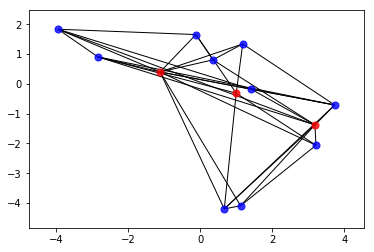

In [165]:
%pylab inline --no-import-all
if(n == 2):
    G=nx.Graph()

    for i in range(n+1):
        G.add_node(i,pos=a[i])

    for i in range(npoints):
        G.add_node(n+1+i,pos=p[i])

    pos=nx.get_node_attributes(G,'pos')

    nx.draw_networkx_nodes(G,pos,
                           nodelist=[i for i in range(n+1)],
                           node_color='r',
                           node_size=50,
                           alpha=0.8)
    nx.draw_networkx_nodes(G,pos,
                           nodelist=[i for i in range(n+1,npoints+n+1)],
                           node_color='b',
                           node_size=50,
                           alpha=0.8)
    for i in range(npoints+n+1):
        for j in range(n+1,npoints+n+1):
            if(adjacency[j,i] > 0.):
                G.add_edge(i,j)

    nx.draw_networkx_edges(G,pos)
    plt.draw()  # pyplot draw()

## SDP

In [166]:
T = n + npoints

# We are working in R^2
            
#This creates a 3x3 semipositive definite matrix which we will 
#use as part of our constraints
z = cvx.Semidef(T)

eyeConstraint = []
anchorConstraints = []
pointConstraints = []

for i in range(n):
    temp = np.zeros((T,T))
    temp[i][i] = 1
    eyeConstraint.append(temp)
    
temp = np.zeros((T,T))
for i in range(n):
    for j in range(n):
        temp[i][j] = 1
eyeConstraint.append(temp)

for (distance, i, j, truth) in d:
    if truth:
        temp = np.zeros(npoints)
        temp[i] = -1.
        anchorConstraints.append((np.outer(np.append(a[j], temp), np.append(a[j], temp)), distance))
    else:
        tempi = np.zeros(npoints)
        tempj = np.zeros(npoints)
        tempi[i] = 1.
        tempj[j] = 1.
        temp = tempi - tempj
        corner = np.zeros(n)
        temp = np.append(corner, temp)
        pointConstraints.append((np.outer(temp,temp), distance))

print d

#Another empty states list
states = []

cost = cvx.norm(0)

#The four constraints in the SDP relaxation problem
#Note that the last constraint forces z to be SPD
constr = []

for i, mat in enumerate(eyeConstraint):
    if i < len(eyeConstraint) - 1:
        constr.append(cvx.sum_entries(cvx.mul_elemwise(mat, z)) == 1)
    else:
        constr.append(cvx.sum_entries(cvx.mul_elemwise(mat, z)) == n)

for mat in anchorConstraints:
    constr.append(cvx.sum_entries(cvx.mul_elemwise(mat[0], z)) ==  mat[1] ** 2)

for mat in pointConstraints:
    constr.append(cvx.sum_entries(cvx.mul_elemwise(mat[0], z)) ==  mat[1] ** 2)

constr.append(z >> 0)

#Add the constraints and cost function
states.append(cvx.Problem(cvx.Minimize(cost), constr))

#Solve the SDP relaxation problem
prob = sum(states)
prob.solve();    

print('Solution: ' + prob.status)

for i in range(npoints):
    soln1 = z.value.A[0:n, i + n]
    point1 = p[i]
    print("Sensor " + str(i) + " is located at " + str(soln1) + " and the actual value is " + str(point1))

[(2.5946513608297574, 0, 0, True), (2.4789909954492271, 1, 0, True), (4.9727077869346097, 2, 0, True), (3.1766373344308501, 3, 0, True), (5.0197966724548566, 4, 0, True), (4.9793083006969168, 5, 0, True), (1.6024961317134168, 6, 0, True), (1.7964519110499213, 7, 0, True), (1.5224182374840307, 8, 0, True), (4.9347132313801669, 9, 0, True), (2.1381301919798608, 0, 1, True), (0.86438238611487528, 2, 1, True), (7.8236887326687743, 3, 1, True), (3.4111542090088269, 4, 1, True), (0.68491366854143654, 5, 1, True), (6.4414318200115339, 7, 1, True), (3.5767656764438298, 8, 1, True), (3.7818126576400877, 9, 1, True), (1.6642507930065906, 1, 2, True), (2.8219947901220204, 5, 2, True), (2.2645371793816005, 6, 2, True), (4.0260352565823787, 7, 2, True), (3.9020751732569785, 9, 2, True), (2.3780564509545186, 0, 2, False), (5.7290410676574233, 0, 3, False), (3.2754957240461771, 1, 2, False), (0.9841901388109402, 1, 8, False), (6.7668496750577267, 2, 7, False), (4.6455945346499243, 2, 9, False), (3.83

## SDM

In [167]:
# Note that the summations are unrolled for the ease of coding.
# The objective function is for the distances d11, d12, d22, d23, dhat12

# We update the objective function seen with two sensors and three anchors
def SNL(a, x, d):
    sum_obj = 0
    
    for (distance, i, j, truth) in d:
        if truth:
            sum_obj += ((np.linalg.norm(a[j] - x[i]) ** 2) - distance ** 2) ** 2
        else:
            sum_obj += (((np.linalg.norm(x[i] - x[j]) ** 2) - distance ** 2) ** 2)/2
    
    return sum_obj

# Here, we perform the gradient of the objective function
# Note that we keep the gradients for the two different
# sensors separate and stored in sum_x[0] and sum_x[1]
# respectively
def dSNL(a, x, d, npoints, n):
    sum_x = np.zeros((npoints, n))
    
    for (distance, i, j, truth) in d:
        if truth:
            sum_x[i] += 4 * (np.linalg.norm(a[j] - x[i]) ** 2 - distance ** 2) * (-a[j] + x[i])
        else:
            sum_x[i] += 4 * (np.linalg.norm(x[i] - x[j]) ** 2 - distance ** 2) * (x[i] - x[j])

    return sum_x

# Updated steepest descent where we perform it twice for the two
# different sensors
def steepest_descent_2(op, dop, a, xin, d, niter, npoints, n):
    x = np.copy(xin)
    
    for i in range(0, niter):
            direction = dop(a, x, d, npoints, n)
            
            alpha = 1.
            
            for j in range(npoints):
                while(op(a, x  - alpha * direction, d) > op(a, x, d) \
                      - 0.5 * alpha * np.dot(direction[j], direction[j])):
                        if alpha < 1e-9:
                            break
                        alpha *= 0.9

            x -= alpha * direction
    
    return x

In [168]:
import copy
x = [np.random.rand(n) for i in range(npoints)]

d2 = copy.copy(d)

for k in range(len(d)):
    (distance, i, j, truth) = d[k]
    
    if not truth:
        d2.append((distance, j, i, truth))

soln = steepest_descent_2(SNL, dSNL, a, x, d2, 40, npoints, n)
for i in range(npoints):
    print("Sensor " + str(i) + " is located at " + str(soln[i]) + " and the actual value is " + str(p[i]))

Sensor 0 is located at [ 1.37432595 -0.36959974] and the actual value is [ 1.41197309 -0.17879389]
Sensor 1 is located at [ 0.9122232   0.09158041] and the actual value is [ 1.17651365  1.34126421]
Sensor 2 is located at [ 3.22614883 -1.99125407] and the actual value is [ 3.72984667 -0.71040894]
Sensor 3 is located at [-3.23128731  3.06502067] and the actual value is [-3.95126328  1.83555643]
Sensor 4 is located at [ 3.58502499  2.1091874 ] and the actual value is [ 1.11732313 -4.09432667]
Sensor 5 is located at [ 3.75124611 -0.72076454] and the actual value is [ 3.20990851 -2.06305277]
Sensor 6 is located at [ 0.13673709  1.40292156] and the actual value is [-0.12153468  1.65643543]
Sensor 7 is located at [-2.38890724  1.76330435] and the actual value is [-2.84135696  0.90499732]
Sensor 8 is located at [ 0.39634991  0.85881067] and the actual value is [ 0.35017082  0.806673  ]
Sensor 9 is located at [ 3.34819784  2.59015701] and the actual value is [ 0.66449517 -4.20113506]
